In [16]:
%matplotlib inline

from modsim import *
import math

Time to set the intial conditions; this sets up all the parameters for the rocket, its engine, and the environment it's in.  

In [17]:
# Set initial conditions.  These conditions will be used in make_system to generate a system.

condition = Condition(# Set cap for simulation time
                      duration=105, #*s,
                      
                      # -----------------------------------------
                      # Initial state and environmental properties
                      # -----------------------------------------
                      y=0, #*m, 
                      g=9.8, #*m/s**2,
                      velocity=0, #*m/s,
                      rho_air=1.2, #*kg/m**3,
                      
                      # -----------------------------------------
                      # Properties of the rocket body
                      # -----------------------------------------
                      m_rocket=50, #*gm,
                      diameter=4, #*cm, 
                      C_d=0.75, 
                      thetaCone=75,
                      
                      # -----------------------------------------
                      # Properties of the engine and exhaust
                      # -----------------------------------------
                      m_engine=52.0159, #*gm,
                      v_exhaust=5000, # * m/s,
                      rho_fuel=1.6426, #*gm/cm**3,
                      engineSA=4.5234, #*cm**2,
                      burnRate=0.1, #*cm/s,   THIS USED TO READ 1 (mm) which I think was wrong
                      
                      )

# Set initial conditions.  These conditions will be used in make_system to generate a system.

condition2 = Condition(# Set cap for simulation time
                      duration=105, #*s,
                      
                      # -----------------------------------------
                      # Initial state and environmental properties
                      # -----------------------------------------
                      y=0, #*m, 
                      g=9.8, #*m/s**2,
                      velocity=0, #*m/s,
                      rho_air=1.2, #*kg/m**3,
                      
                      # -----------------------------------------
                      # Properties of the rocket body
                      # -----------------------------------------
                      m_rocket=50, #*gm,
                      diameter=4, #*cm, 
                      C_d=0.75, 
                      thetaCone=75,
                      
                      # -----------------------------------------
                      # Properties of the engine and exhaust
                      # -----------------------------------------
                      m_engine=0, #*gm,
                      v_exhaust=5000, # * m/s,
                      rho_fuel=1.6426, #*gm/cm**3,
                      engineSA=4.5234, #*cm**2,
                      burnRate=0.1, #*cm/s,   THIS USED TO READ 1 (mm) which I think was wrong
                      
                      )

In [134]:
# Set initial conditions NOTE: FOR ESTES ENGINE TO DETERMINE DRAG.  These conditions will be used in make_system to generate a system.

condition = Condition(# Set cap for simulation time
                      duration=105, #*s,
                      
                      # -----------------------------------------
                      # Initial state and environmental properties
                      # -----------------------------------------
                      y=0, #*m, 
                      g=9.8, #*m/s**2,
                      velocity=0, #*m/s,
                      rho_air=1.2, #*kg/m**3,
                      
                      # -----------------------------------------
                      # Properties of the rocket body
                      # -----------------------------------------
                      m_rocket=40, #*gm,
                      diameter=2.5, #*cm, 
                      C_d=0.75, 
                      thetaCone=85,
                      
                      # -----------------------------------------
                      # Properties of the engine and exhaust
                      # -----------------------------------------
                      m_engine=10.8, #*gm,
                      v_exhaust=5000, # * m/s,
                      rho_fuel=1.7, #*gm/cm**3,
                      engineSA=5.76, #*cm**2,
                      burnRate=0.4, #*cm/s,   THIS USED TO READ 1 (mm) which I think was wrong
                      
                      )

# Set initial conditions.  These conditions will be used in make_system to generate a system.

condition2 = Condition(# Set cap for simulation time
                      duration=105, #*s,
                      
                      # -----------------------------------------
                      # Initial state and environmental properties
                      # -----------------------------------------
                      y=0, #*m, 
                      g=9.8, #*m/s**2,
                      velocity=0, #*m/s,
                      rho_air=1.2, #*kg/m**3,
                      
                      # -----------------------------------------
                      # Properties of the rocket body
                      # -----------------------------------------
                      m_rocket=40, #*gm,
                      diameter=2.5, #*cm, 
                      C_d=0.75, 
                      thetaCone=85,
                      
                      # -----------------------------------------
                      # Properties of the engine and exhaust
                      # -----------------------------------------
                      m_engine=0, #*gm,
                      v_exhaust=5000, # * m/s,
                      rho_fuel=1.6426, #*gm/cm**3,
                      engineSA=4.5234, #*cm**2,
                      burnRate=0.1, #*cm/s,   THIS USED TO READ 1 (mm) which I think was wrong
                      
                      )

Let's define a function to make systems for us.  This needs to copy certain parameters from the initial Condition object to the system and calculate the surface area of the rocket that will need to be accounted for in the drag calculation.

In [18]:
# Takes in an initial condition and generates a full system

def make_system(condition):
    
    unpack(condition)
    
    vy = velocity
    init = State(m_engine=m_engine,y=y,vy=vy)
    
    #REDACTED TO DUE GUESS AND CHECK
    #r = diameter/2
    #h = r*math.tan(thetaCone)
    #coneSA = 3.14159 * r * (r + sqrt(r*r + h*h))
    
    
    coneSA = 4
    
    ts = linspace(0,duration,101)
    
    return System(init=init,
                  g=g,
                  rho_air=rho_air,
                  C_d=C_d,
                  engineSA=engineSA,
                  m_engine=m_engine,
                  m_rocket=m_rocket,
                  rho_fuel=rho_fuel,
                  burnRate=burnRate,
                  ts=ts,
                  coneSA=coneSA,
                  v_exhaust=v_exhaust)

In [32]:
# Takes in an initial condition and generates a full system

def make_system2(condition2, t0):
    
    unpack(condition2)
    vy = velocity
    init = State(m_engine=m_engine,y=y,vy=vy)
    
    #REDACTED DUE TO GUESS AND CHECK
    #r = diameter/2
    #h = r*math.tan(thetaCone)
    #coneSA = 3.14159 * r * (r + sqrt(r*r + h*h))
    
    coneSA = 4
    
    
    ts = linspace(t0,duration,101)
    
    return System(init=condition2.init,
                  g=g,
                  rho_air=rho_air,
                  C_d=C_d,
                  engineSA=engineSA,
                  m_engine=0,
                  m_rocket=m_rocket,
                  ts=ts,
                  coneSA=coneSA)

In [20]:
# Run this function UNTIL THE ENGINE RUNS OUT OF FUEL

def slope_func1(state,t,system):
    
    unpack(system)
        
    # Grab the initial state of everything
    m_engine, y, vy = state
    
    # Calculate m_dot
    m_dot = -1 * rho_fuel * engineSA * burnRate
    
    m = m_rocket + m_engine
    
    # Calculate the acceleration due to drag
    f_drag = rho_air * C_d * vy*vy * coneSA / 2
    a_drag = f_drag / m
    
    ay = (v_exhaust * -1 * m_dot) / m - g - a_drag
    
    
    #if m_engine < 0:
        #print("Engine mass " + str(m_engine) + " at time " + str(t))
            
    return m_dot, vy, ay

In [21]:
# Run this function AFTER THE ENGINE RUNS OUT OF FUEL

def slope_func2(state,t,system):
    
    unpack(system)
    
    # Grab the initial state of everything
    m_engine, y, vy = state
    
    m = m_rocket
    
    # Calculate the acceleration due to drag
    f_drag = rho_air * C_d * vy*vy * coneSA / 2
    a_drag = f_drag / m
    # Calculate the net acceleration on the rocket
    ay = -1 * g - a_drag
       
    return 0, vy, ay

In [42]:
system = make_system(condition)
slope_func1(system.init, 0, system)

(-0.74301368400000001, 0.0, 26.616562712283088)

In [11]:
system = make_system(condition2)
slope_func2(system.init, 0, system)

(0, 0.0, -9.8000000000000007)

Engine mass -0.60145647006 at time 70.81613381168869
Engine mass -0.60145647006 at time 70.81613381168869


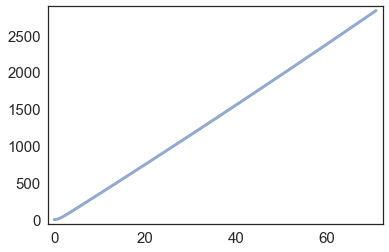

In [7]:
testCondition1 = condition
testCondition1.duration = 70.8

system = make_system(testCondition1)
run_odeint(system,slope_func1)

plot(system.results.y)
#plot(system.results.vy)

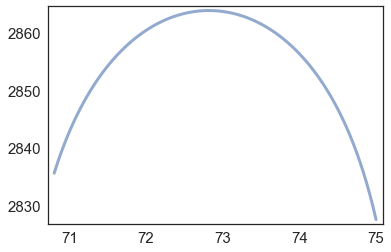

In [8]:
testCondition2 = condition2
testCondition2.duration = 75
testCondition2.init = system.results.iloc[-1]

system2 = make_system2(testCondition2, 70.8)
run_odeint(system2,slope_func2)

plot(system2.results.y)

In [34]:
#Takes everything above and rolls it together

"""
make this better
"""

def run_simulation(condition1, condition2, burn_rate, t_end=75, guess=80):
    
    #Runs the burn simulation initially
    
    condition1.set(duration=guess)
    
    condition1.set(burnRate=burn_rate)
    
    system=make_system(condition1)
    
    run_odeint(system,slope_func1)
    
    
    #Interpolates Time that Engine cuts out
    
    Engine = interp_inverse(system.results.m_engine)
    
    t_burnout = Engine(0)
    
    
    #Runs simulation again with new duration
    
    condition1.set(duration=t_burnout)
    
    system=make_system(condition1)
    
    run_odeint(system,slope_func1)
    
    results1 = system.results
    
    
    #Runs second simulation intially
    
    condition2.init = system.results.iloc[-1]
    
    condition2.set(duration=t_end)
    
    system2 = make_system2(condition2, t_burnout)
    
    run_odeint(system2, slope_func2)
    
    results2 = system2.results
    
    
    
    #Combines results
    
    results = [results1, results2]
    
    combined = pd.concat(results)
    
    return combined.y.max()

In [38]:
results = run_simulation(condition, condition2, 0.1)

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [28]:
def sweep_burns(sweep_array):
    sweep = SweepSeries()
    for rate in burn_array:
        sweep[rate] = run_simulation(condition, condition2, rate)
    return sweep

In [36]:
burn_array = linspace(0.1, 0.3, 9)
please = sweep_burns(burn_array)
please

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


,value
0.100,9.769583e+270
0.125,2.830195e+03
0.150,1.465697e+294
0.175,2.830195e+03
0.200,4.706477e+267
0.225,5.296901e+03
0.250,2.774548e+299
0.275,5.927118e+03
0.300,5.714284e+03
